# Série 8
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices pour la semaine prochaine.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français or English** ce que vous avez codé dans la cellule correspondante


Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.


Les tentatives infructueuses, les explications, commentaires et analyses des échecs rapportent des points. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Contributions
*Exercice : [contribution Radomski, contribution Darmanger]*
- 1 : [60%, 40%]
- 2 : [60%, 40%]

## Exercice 1
**Le problème de la ligne d'horizon.**

Un immeuble Bi est représenté par un triplet (Li, Hi, Ri) où Li et Ri désignent la coordonées x de la partie gauche et droite de l'immeuble, et Hi désigne la hauteur de l'immeuble. Une ligne d'horizon d'un ensemble de n immeuble est une liste des coordonnées x et des hauteurs qui les relient, classées dans l'ordre de gauche à droite.

Exemple: La ligne d'horizon des immeubles

<center>{(3, 13, 9),(1, 11, 5),(12, 7, 16),(14, 3, 25),(19, 18, 22),(2, 6, 7),(23, 13, 29),(23, 4, 28)}</center>

<center>est</center>

<center>{1, 11, 3, 13, 9, 0, 12, 7, 16, 3, 19, 18, 22, 3, 23, 13, 29, 0}</center>

<center>où les points référencent alternativement l'axe des abscissses et des ordonnées</center>

<center>(notez que les coordonnées x dans un horizon sont triées).</center>

Soit la taille d'une ligne d'horizon le nombre total d'éléments (coordonnées et hauteurs) de sa liste. Implémentez un algorithme pour combiner une ligne d'horizon A de taille n1 et une ligne d'horizon B de taille n2 en une ligne d'horizon S de taille O(n1 + n2). Votre algorithme doit s'exécuter en un temps O(n1 + n2).

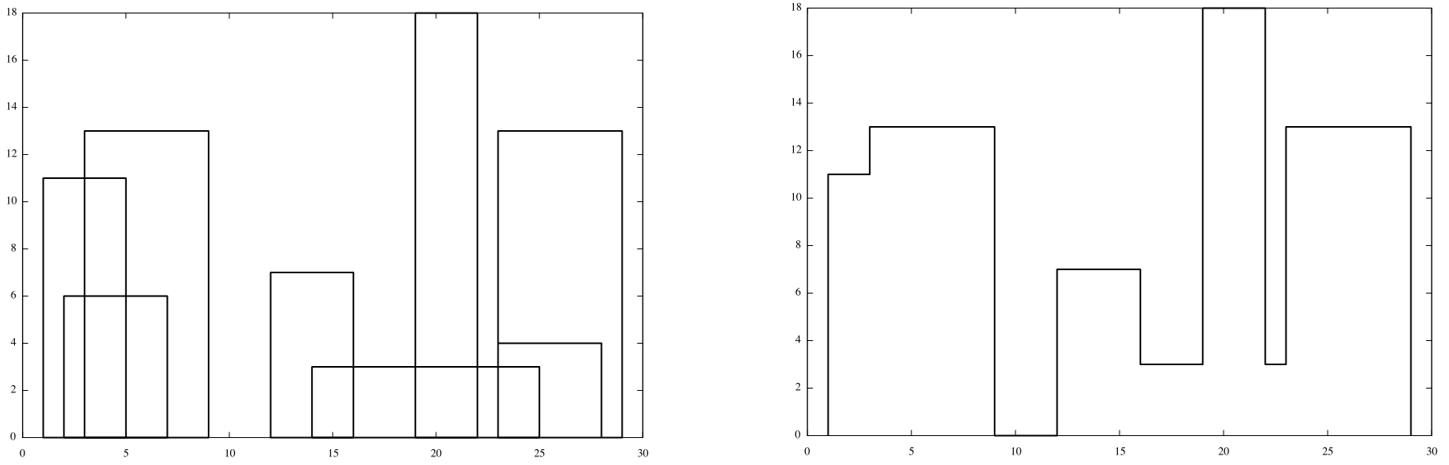

In [190]:
import typing


class Comparable[T](typing.Protocol):
    def __lt__(self, other: T, /) -> bool: ...


def merge_sorted_iterators[
    TElement,
](
    first_iterator: typing.Iterator[TElement],
    second_iterator: typing.Iterator[TElement],
    *,
    less_than: typing.Callable[[TElement, TElement], bool],
) -> typing.Generator[TElement, None, None]:
    def get_next_value(iterator: typing.Iterator[TElement]) -> TElement | None:
        try:
            return next(iterator)
        except StopIteration:
            return None

    first_value = get_next_value(first_iterator)
    second_value = get_next_value(second_iterator)
    while first_value is not None and second_value is not None:
        if less_than(first_value, second_value):
            yield first_value
            first_value = get_next_value(first_iterator)
        else:
            yield second_value
            second_value = get_next_value(second_iterator)

    if first_value is not None:
        yield first_value
        yield from first_iterator

    if second_value is not None:
        yield second_value
        yield from second_iterator


def find_max[
    TElement
](
    elements: typing.Iterable[TElement],
    *,
    less_than: typing.Callable[[TElement, TElement], bool],
) -> TElement:
    iterator = iter(elements)

    try:
        max_element = next(iterator)
    except StopIteration:
        raise ValueError("iterator must not be empty")

    for current_element in elements:
        if less_than(max_element, current_element):
            max_element = current_element

    return max_element

In [196]:
import dataclasses
import itertools
import typing


@dataclasses.dataclass
class Building:
    skyline_id: int
    x: int
    height: int


def as_buildings_iterator(
    skyline_id: int, skyline: list[int]
) -> typing.Iterator[Building]:
    if len(skyline) % 2 != 0:
        raise ValueError("skylines must be of even length")

    current_building_idx = 0
    while current_building_idx < len(skyline):
        building_x, building_height = skyline[
            current_building_idx : current_building_idx + 2
        ]
        yield Building(skyline_id, building_x, building_height)

        current_building_idx += 2


def combine_skyline(first_skyline: list[int], second_skyline: list[int]) -> list[int]:
    def building_dominance_order_less_than(first: Building, second: Building) -> bool:
        if first.height < second.height:
            return True

        return first.height == second.height and first.x <= second.x
    
    def building_iteration_order_less_than(first: Building, second: Building) -> bool:
        if first.x < second.x:
            return True
        
        return first.x == second.x and first.height >= second.height

    combined_skyline: list[Building] = []

    try:
        active_buildings = [Building(skyline_id, -1, -1) for skyline_id in range(2)]
        best_building = active_buildings[0]
    except StopIteration:
        return []

    for current_building in merge_sorted_iterators(
        as_buildings_iterator(0, first_skyline),
        as_buildings_iterator(1, second_skyline),
        less_than=building_iteration_order_less_than,
    ):
        active_buildings[current_building.skyline_id] = current_building

        previously_best_building = best_building
        best_building = find_max(
            active_buildings, less_than=building_dominance_order_less_than
        )

        if best_building is previously_best_building:
            continue

        combined_skyline.append(
            Building(best_building.skyline_id, current_building.x, best_building.height)
        )

    return list(
        itertools.chain.from_iterable([it.x, it.height] for it in combined_skyline)
    )

In [192]:
a = [1,8,6,10,8,0]
b = [2,4,5,15,11,0]
s = combine_skyline(a,b)
print("Skyline A:")
print(a)
print("Skyline B:")
print(b)
print("Skyline S (must be [1, 8, 5, 15, 11, 0]):")
print(s)
assert s == [1,8,5,15,11,0], "The merge of skyline A and skyline B failed"

print()

a = [2,7,7,9,10,5,14,12,15,0]
b = [3,6,8,12,9,3,13,15,16,0]
s = combine_skyline(a,b)
print("Skyline A:")
print(a)
print("Skyline B:")
print(b)
print("Skyline S (must be [2, 7, 7, 9, 8, 12, 9, 9, 10, 5, 13, 15, 16, 0]):")
print(s)
assert s == [2,7,7,9,8,12,9,9,10,5,13,15,16,0]

Skyline A:
[1, 8, 6, 10, 8, 0]
Skyline B:
[2, 4, 5, 15, 11, 0]
Skyline S (must be [1, 8, 5, 15, 11, 0]):
[1, 8, 5, 15, 11, 0]

Skyline A:
[2, 7, 7, 9, 10, 5, 14, 12, 15, 0]
Skyline B:
[3, 6, 8, 12, 9, 3, 13, 15, 16, 0]
Skyline S (must be [2, 7, 7, 9, 8, 12, 9, 9, 10, 5, 13, 15, 16, 0]):
[2, 7, 7, 9, 8, 12, 9, 9, 10, 5, 13, 15, 16, 0]


#### Explications

<< A REMPLIR PAR L'ETUDIANT >>

### Exercice 1.1
Implémentez un algorithme de "diviser pour régner" O(n log n) pour trouver la ligne d'horizon de n bâtiments.

In [197]:
# Le paramètre "buildings" est une liste composée de triplets (Li, Hi, Ri) comme indiqué dans l'exercice 1.
# La valeur retournée est une liste, formant la ligne d'horizon.
def find_skyline(buildings: list[tuple[int, int, int]]) -> list[int]:
    if len(buildings) == 0:
        return []
    
    if len(buildings) == 1:
        left_x, height, right_x = buildings[0]
        return [left_x, height, right_x, 0]

    pivot_idx = len(buildings) // 2
    left_skyline = find_skyline(buildings[:pivot_idx])
    right_skyline = find_skyline(buildings[pivot_idx:])

    return combine_skyline(left_skyline, right_skyline)

In [199]:
skyline = find_skyline([[3, 13, 9],[1, 11, 5],[12, 7, 16],[14, 3, 25],[19, 18, 22],[2, 6, 7],[23, 13, 29],[23, 4, 28]])
# Décommentez la ligne ci-dessous si votre réponse est une liste en 2D pour la convertir en liste 1D
# skyline = sum(skyline, [])
print(skyline)
assert skyline == [1, 11, 3, 13, 9, 0, 12, 7, 16, 3, 19, 18, 22, 3, 23, 13, 29, 0]


[1, 11, 3, 13, 9, 0, 12, 7, 16, 3, 19, 18, 22, 3, 23, 13, 29, 0]


## Exercice 2
Le tri par fusion (merge sort) est l'algorithme classique de type  `diviser pour régner`. Implémentez et analysez-le en essayant de grands inputs. Assurez-vous d'essayer des inputs à la fois distribués de manière aléatoire et triés par ordre décroissant.

In [182]:
import typing


class Comparable[T](typing.Protocol):
    def __lt__(self, other: T, /) -> bool: ...


def merge_sorted_iterators[
    TElement, TKey: Comparable[typing.Any]
](
    first_iterator: typing.Iterator[TElement],
    second_iterator: typing.Iterator[TElement],
    *,
    key: typing.Callable[[TElement], TKey],
) -> typing.Generator[TElement, None, None]:
    def get_next_value(iterator: typing.Iterator[TElement]) -> TElement | None:
        try:
            return next(iterator)
        except StopIteration:
            return None

    first_value = get_next_value(first_iterator)
    second_value = get_next_value(second_iterator)
    while first_value is not None and second_value is not None:
        if key(first_value) < key(second_value):
            yield first_value
            first_value = get_next_value(first_iterator)
        else:
            yield second_value
            second_value = get_next_value(second_iterator)

    if first_value is not None:
        yield first_value
        yield from first_iterator

    if second_value is not None:
        yield second_value
        yield from second_iterator


def merge_sort[T: Comparable[typing.Any]](elements: list[T]) -> list[T]:
    if len(elements) <= 1:
        return elements

    pivot_idx = len(elements) // 2
    left = merge_sort(elements[:pivot_idx])
    right = merge_sort(elements[pivot_idx:])

    return list(merge_sorted_iterators(iter(left), iter(right), key=lambda it: it))

In [180]:
def _merge_sort[T: Comparable[typing.Any]](elements: list[T], lower: int, upper: int) -> list[T]:
    if upper - lower == 1:
        return [elements[lower]]

    pivot_idx = (upper-lower) // 2
    left = _merge_sort(elements, lower, lower + pivot_idx)
    right = _merge_sort(elements, lower + pivot_idx, upper)

    result: list[T] = [] 

    left_idx = 0
    right_idx = 0
    while left_idx < len(left) and right_idx < len(right):
        left_element = left[left_idx]
        right_element = right[right_idx]

        if left_element < right_element:
            result.append(left_element)
            left_idx += 1
        else:
            result.append(right_element)
            right_idx += 1

    return result + left[left_idx:] + right[right_idx:]


def merge_sort[T: Comparable[typing.Any]](elements: list[T]) -> list[T]:
    return _merge_sort(elements, 0, len(elements))

In [184]:
def _merge_sort[
    T: Comparable[typing.Any]
](
    elements: list[T], buffer: list[typing.Any], lower: int, upper: int, write_to_buffer: bool
) -> None:
    if upper - lower == 1:
        if write_to_buffer:
            buffer[lower] = elements[lower]
        return

    pivot_idx = lower + ((upper - lower) // 2)
    _merge_sort(elements, buffer, lower, pivot_idx, not write_to_buffer)
    _merge_sort(elements, buffer, pivot_idx, upper, not write_to_buffer)

    left_idx = lower
    right_idx = pivot_idx
    target_idx = lower

    source = elements if write_to_buffer else buffer
    target = buffer if write_to_buffer else elements

    while left_idx < pivot_idx and right_idx < upper:
        left_element = source[left_idx]
        right_element = source[right_idx]

        if left_element < right_element:
            target[target_idx] = left_element
            left_idx += 1
        else:
            target[target_idx] = right_element
            right_idx += 1

        target_idx += 1

    if left_idx < pivot_idx:
        target[target_idx:upper] = source[left_idx:pivot_idx]

    if right_idx < upper:
        target[target_idx:upper] = source[right_idx:upper]


def merge_sort[T: Comparable[typing.Any]](elements: list[T]) -> list[T]:
    buffer = [0] * len(elements)
    _merge_sort(elements, buffer, 0, len(elements), True)

    return typing.cast(list[T], buffer)

In [178]:
import random

random_list: list[int] = []
for i in range(0, 20):
    n = random.randint(1, 5000)
    random_list.append(n)

print("Initial list (random order): ")
print(random_list)
print("My sorted list")
my_sorted_list = merge_sort(random_list.copy())
print(my_sorted_list)
print("Python sorted list")
python_sorted_list = random_list.copy()
python_sorted_list.sort()
print(python_sorted_list)
assert my_sorted_list == python_sorted_list, "The list is not correctly sorted"

print()
random_list = []
for i in range(0, 25):
    n = random.randint(1, 5000)
    random_list.append(n)

print("Initial list (descending order): ")
random_list.sort()
random_list.reverse()
print(random_list)
print("My sorted list")
my_sorted_list = merge_sort(random_list.copy())
print(my_sorted_list)
print("Python sorted list")
python_sorted_list = random_list.copy()
python_sorted_list.sort()
print(python_sorted_list)
assert my_sorted_list == python_sorted_list, "The list is not correctly sorted"

Initial list (random order): 
[1889, 3238, 3949, 2405, 267, 4621, 2469, 3467, 3362, 1716, 4032, 4422, 1458, 4672, 4405, 4954, 12, 101, 4409, 526]
My sorted list
[12, 101, 267, 526, 1458, 1716, 1889, 2405, 2469, 3238, 3362, 3467, 3949, 4032, 4405, 4409, 4422, 4621, 4672, 4954]
Python sorted list
[12, 101, 267, 526, 1458, 1716, 1889, 2405, 2469, 3238, 3362, 3467, 3949, 4032, 4405, 4409, 4422, 4621, 4672, 4954]

Initial list (descending order): 
[4482, 3913, 3899, 3717, 3511, 3366, 3292, 3227, 2961, 2556, 2478, 2332, 2270, 2265, 2244, 1743, 1363, 1128, 904, 888, 840, 746, 435, 420, 102]
My sorted list
[102, 420, 435, 746, 840, 888, 904, 1128, 1363, 1743, 2244, 2265, 2270, 2332, 2478, 2556, 2961, 3227, 3292, 3366, 3511, 3717, 3899, 3913, 4482]
Python sorted list
[102, 420, 435, 746, 840, 888, 904, 1128, 1363, 1743, 2244, 2265, 2270, 2332, 2478, 2556, 2961, 3227, 3292, 3366, 3511, 3717, 3899, 3913, 4482]


In [185]:
import random
import sys
import time

def run_with(elements: list[int]) -> int:
    start = time.process_time_ns()
    merge_sort(elements)#, 0, len(elements))
    end = time.process_time_ns()

    duration_ms = (end - start) // 1_000_000
    return duration_ms

random_list = [random.randint(1, sys.maxsize) for _ in range(1_000_000)]
random_duration_ms = run_with(random_list)
print(f"Sorting of random list took {random_duration_ms} ms")

descending_list = [random.randint(1, sys.maxsize) for _ in range(1_000_000, 0, -1)]
random_duration_ms = run_with(descending_list)
print(f"Sorting of descending list took {random_duration_ms} ms")

Sorting of random list took 2203 ms
Sorting of descending list took 2195 ms


### Explications

<< A REMPLIR PAR L'ETUDIANT >>